
Integrantes:

David Bugoi

Fernando Javier Gómez Márquez

Daniel Hernández Martínez

Carga de datos

Dataset: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import os.path

In [ ]:
def genera_df(ficherocsv, nro_filas=None):
    try:
      from google.colab import drive
      drive.mount('/content/drive')
      df = pd.read_csv(os.path.join('drive/MyDrive/Colab Notebooks/',ficherocsv), nrows=nro_filas)
    except:   # si no es en google colab, se supone que estamos ejecutando el notebook en nuestro servidor local y que el fichero está en el mismo directorio
      df = pd.read_csv(ficherocsv, nrows=nro_filas)
    return df

In [ ]:
fdatos = 'heart.csv'

df = genera_df(fdatos)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Comprobamos si existen valores nulos en el dataframe

In [ ]:
df.isnull().values.any()

False

Como no hay ningún null ni NaN no hay que hacer tratamiento al dataframe. En caso de existir algún valor null tendríamos dos opiones: eliminar la fila o sustituir los nulos por algún valor, generalmente la media de la columna

Aplicamos la funcion BernouliNB de la libreria scikit learn para realizar el Naive Bayes 

In [ ]:
RANDOM_STATE = 813

In [ ]:
X = df.drop(['HeartDisease'], axis=1).values
y = df['HeartDisease'].values

# LabelEncoder
Usamos el LabelEncoder para pasar las variables catégoricas a numericas

In [ ]:
df_label = df.apply(preprocessing.LabelEncoder().fit_transform)
df_label.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0


In [ ]:
X = df_label.drop(['HeartDisease'], axis=1).values
y = df_label['HeartDisease'].values

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X, y, test_size=0.1, random_state = RANDOM_STATE)
X_train_label, X_val_label, y_train_label, y_val_label = train_test_split(X_train_label, y_train_label, test_size=0.1, random_state = RANDOM_STATE)

In [ ]:
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB(alpha=1.0, fit_prior=True)  # alpha es el coeficiente de alisado, y fit_prior=True indica que aprenderá prior del conjunto de entrenamiento

clf.fit(X_train_label, y_train_label)   # el método fit entrena el modelo con los datos que se le pasan

BernoulliNB()

Entrenado el modelo ya se puede probar con el método predict_proba() para obtener las probabilidades de cada clase, y el método predict() para obtener la clase más probable.

In [ ]:
pred_prob = clf.predict_proba(X_test_label)
print('[scikit-learn] Predicted probabilities:\n', pred_prob)

pred = clf.predict(X_test_label)
print('[scikit-learn] Prediction:', pred)

[scikit-learn] Predicted probabilities:
 [[0.09382091 0.90617909]
 [0.03222841 0.96777159]
 [0.03222841 0.96777159]
 [0.97198761 0.02801239]
 [0.09382091 0.90617909]
 [0.97198761 0.02801239]
 [0.01182079 0.98817921]
 [0.09382091 0.90617909]
 [0.96554752 0.03445248]
 [0.002943   0.997057  ]
 [0.01182079 0.98817921]
 [0.1026736  0.8973264 ]
 [0.97198761 0.02801239]
 [0.81305885 0.18694115]
 [0.09382091 0.90617909]
 [0.09382091 0.90617909]
 [0.88765185 0.11234815]
 [0.02491087 0.97508913]
 [0.09382091 0.90617909]
 [0.91776781 0.08223219]
 [0.61159455 0.38840545]
 [0.31257028 0.68742972]
 [0.02491087 0.97508913]
 [0.81305885 0.18694115]
 [0.97198761 0.02801239]
 [0.02491087 0.97508913]
 [0.02745842 0.97254158]
 [0.03305222 0.96694778]
 [0.86452525 0.13547475]
 [0.07717023 0.92282977]
 [0.88765185 0.11234815]
 [0.09382091 0.90617909]
 [0.02021702 0.97978298]
 [0.96554752 0.03445248]
 [0.77841056 0.22158944]
 [0.02745842 0.97254158]
 [0.07717023 0.92282977]
 [0.49757269 0.50242731]
 [0.88765

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.svm import SVC

Precisión (Acurracy) :  85.87%
Puntuación de validación cruzada(Cross Validation Score) :  87.55%
Puntuación ROC_AUC :  85.61%


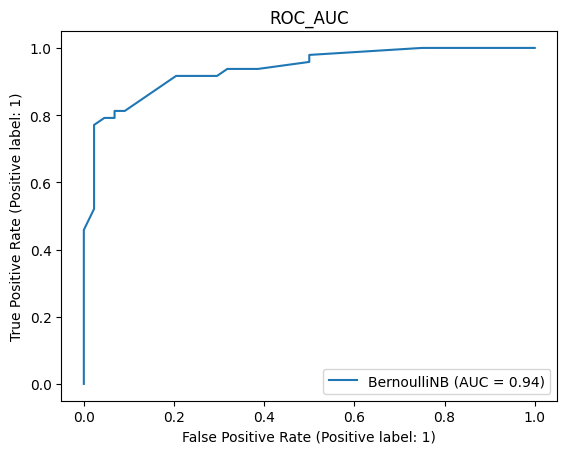

In [ ]:
cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)

print("Precisión (Acurracy) : ",'{0:.2%}'.format(accuracy_score(y_test_label,pred)))
print("Puntuación de validación cruzada(Cross Validation Score) : ",'{0:.2%}'.format(cross_val_score(clf,X_train_label,y_train_label,cv = cv,scoring = 'roc_auc').mean()))
print("Puntuación ROC_AUC : ",'{0:.2%}'.format(roc_auc_score(y_test_label,pred)))

RocCurveDisplay.from_estimator(clf, X_test_label,y_test_label)

plt.title('ROC_AUC')
plt.show()

              precision    recall  f1-score   support

           0       0.90      0.80      0.84        44
           1       0.83      0.92      0.87        48

    accuracy                           0.86        92
   macro avg       0.86      0.86      0.86        92
weighted avg       0.86      0.86      0.86        92



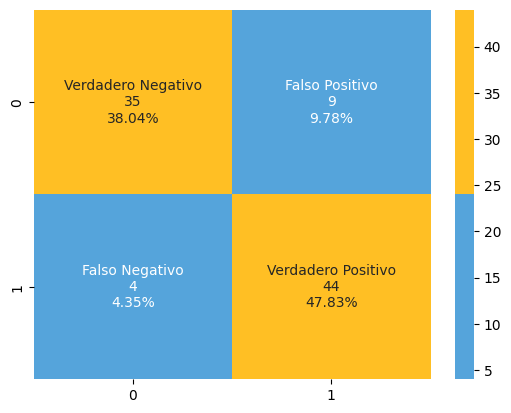

In [ ]:
colores = ['#55A4DB','#FFBF24']
# Matriz de confusión

cm = confusion_matrix(y_test_label,clf.predict(X_test_label))
nombres = ['Verdadero Negativo','Falso Positivo','Falso Negativo','Verdadero Positivo']
counts = [value for value in cm.flatten()]
porcentajes = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
etiquetas = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(nombres,counts,porcentajes)]
etiquetas = np.asarray(etiquetas).reshape(2,2)
sns.heatmap(cm,annot = etiquetas,cmap = colores,fmt ='')

# Informe con clasificaciones
print(classification_report(y_test_label,clf.predict(X_test_label)))

# One Hot Encoder

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = RANDOM_STATE)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state = RANDOM_STATE)

In [ ]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
X_train_enc = enc.fit_transform(X_train)

X_test_enc = enc.transform(X_test)


In [ ]:
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB(alpha=1.0, fit_prior=True)  # alpha es el coeficiente de alisado, y fit_prior=True indica que aprenderá prior del conjunto de entrenamiento

clf.fit(X_train_enc, y_train)   # el método fit entrena el modelo con los datos que se le pasan

BernoulliNB()

In [ ]:
pred_prob = clf.predict_proba(X_test_enc)
print('[scikit-learn] Predicted probabilities:\n', pred_prob)

pred = clf.predict(X_test_enc)
print('[scikit-learn] Prediction:', pred)

[scikit-learn] Predicted probabilities:
 [[1.69791737e-04 9.99830208e-01]
 [5.12213755e-05 9.99948779e-01]
 [1.45733659e-04 9.99854266e-01]
 [9.99980687e-01 1.93133411e-05]
 [8.93489638e-03 9.91065104e-01]
 [9.99999024e-01 9.76069887e-07]
 [5.66015852e-07 9.99999434e-01]
 [1.10773519e-04 9.99889226e-01]
 [9.99987796e-01 1.22043609e-05]
 [2.14991236e-07 9.99999785e-01]
 [8.72978647e-03 9.91270214e-01]
 [7.70662128e-01 2.29337872e-01]
 [9.99988273e-01 1.17266586e-05]
 [6.50930242e-01 3.49069758e-01]
 [4.11432855e-03 9.95885671e-01]
 [1.90319565e-04 9.99809680e-01]
 [9.99993229e-01 6.77076880e-06]
 [1.59532570e-07 9.99999840e-01]
 [8.99686427e-01 1.00313573e-01]
 [6.69333820e-01 3.30666180e-01]
 [1.58591079e-03 9.98414089e-01]
 [1.56879237e-02 9.84312076e-01]
 [2.50174994e-06 9.99997498e-01]
 [9.99972997e-01 2.70025406e-05]
 [9.99614928e-01 3.85071666e-04]
 [1.40734370e-06 9.99998593e-01]
 [3.80408488e-04 9.99619592e-01]
 [5.79973795e-04 9.99420026e-01]
 [9.99860271e-01 1.39729335e-04]
 [

Precisión (Acurracy) :  84.78%
Puntuación de validación cruzada(Cross Validation Score) :  91.70%
Puntuación ROC_AUC :  84.85%


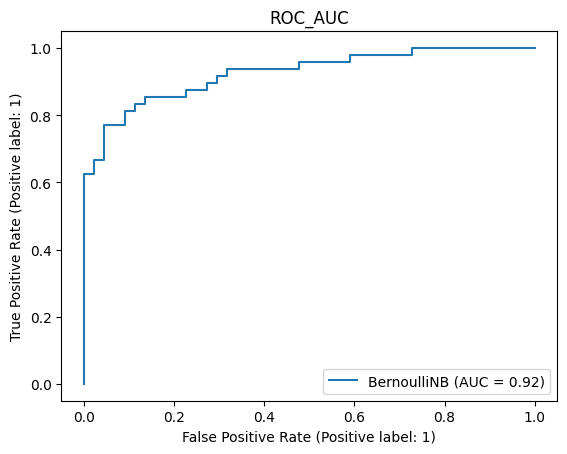

In [ ]:
cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
print("Precisión (Acurracy) : ",'{0:.2%}'.format(accuracy_score(y_test,pred)))
print("Puntuación de validación cruzada(Cross Validation Score) : ",'{0:.2%}'.format(cross_val_score(clf,X_train_enc,y_train,cv = cv,scoring = 'roc_auc').mean()))
print("Puntuación ROC_AUC : ",'{0:.2%}'.format(roc_auc_score(y_test,pred)))
RocCurveDisplay.from_estimator(clf, X_test_enc,y_test)
plt.title('ROC_AUC')
plt.show()

              precision    recall  f1-score   support

           0       0.83      0.86      0.84        44
           1       0.87      0.83      0.85        48

    accuracy                           0.85        92
   macro avg       0.85      0.85      0.85        92
weighted avg       0.85      0.85      0.85        92



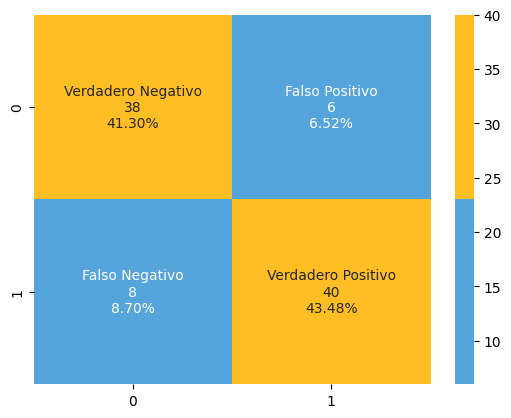

In [ ]:
colores = ['#55A4DB','#FFBF24']
# Matriz de confusión

cm = confusion_matrix(y_test,clf.predict(X_test_enc))
nombres = ['Verdadero Negativo','Falso Positivo','Falso Negativo','Verdadero Positivo']
counts = [value for value in cm.flatten()]
porcentajes = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
etiquetas = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(nombres,counts,porcentajes)]
etiquetas = np.asarray(etiquetas).reshape(2,2)
sns.heatmap(cm,annot = etiquetas,cmap = colores,fmt ='')

# Informe con clasificaciones
print(classification_report(y_test,clf.predict(X_test_enc)))